# 코로나 관련 데이터 분석 및 시각화

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [41]:
import os
os.listdir()

['온라인쇼핑몰_취급상품범위별_상품군별거래액.csv',
 'Titanic_Analysis[MAC].ipynb',
 '.DS_Store',
 'Untitled.ipynb',
 'test.csv',
 '20210916_pd_sns[MAC].ipynb',
 '202010924_plot_express[MAC].ipynb',
 '20210927_visualization_plot_review[MAC].ipynb',
 '20210921_00_datamerge.csv',
 'HTML_CSS_JS_BS_SEL[MAC].ipynb',
 'Web_data[MAC].ipynb',
 'train.csv',
 '.ipynb_checkpoints',
 '20210924_iplot[MAC].ipynb',
 '20210915_class01[MAC].ipynb',
 '20210924_titanic_data_visualization[MAC].ipynb']

In [67]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [43]:
corona = pd.read_csv('20210921_00_datamerge.csv')
corona.shape

(178, 21)

In [44]:
print( pd.options.display.max_rows )
print( pd.options.display.max_columns )

500
500


In [45]:
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0


In [46]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [47]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   국가명         178 non-null    object 
 1   eng_code    178 non-null    object 
 2   발생률         178 non-null    int64  
 3   인구수         178 non-null    int64  
 4   확진자_합계      178 non-null    int64  
 5   백신접종        178 non-null    float64
 6   접종률(인구)     178 non-null    float64
 7   발생률_순위      178 non-null    float64
 8   접종률_순위      178 non-null    float64
 9   확진자비율_전체인구  178 non-null    float64
 10  1차접종        178 non-null    float64
 11  2차접종        178 non-null    float64
 12  위중증         131 non-null    object 
 13  치명(%)       178 non-null    object 
 14  완치(%)       175 non-null    float64
 15  확진자1일       130 non-null    float64
 16  사망자합계       178 non-null    int64  
 17  사망자1일       104 non-null    float64
 18  완치합계        175 non-null    float64
 19  완치1일        115 non-null    f

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

In [49]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

In [50]:
# 컬럼명 변경 : 접종률 -> 백신보유율
corona.columns = ['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)']

In [51]:
# 확진자비율_전체인구 컬럼 삭제
corona = corona.drop(['확진자비율_전체인구'],axis=1) # axis=0 : 인덱스, axis=1 : 컬럼
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)',
       '발생률_순위', '접종률_순위', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

In [52]:
# 새로운 컬럼 만들기
corona['인구당확진자비율'] = corona['확진자_합계'] / corona['인구수']
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986


In [53]:
# 컬럼 순서 바꾸기
corona

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율
0,미국,U.S.,129632,331002651,42908619,3.855860e+08,60.2,13.0,46.0,63.8,54.60,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632
1,인도,India,24277,1380004385,33483170,8.083893e+08,29.6,101.0,99.0,43.7,14.50,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263
2,브라질,Brazil,99924,212559417,21239783,2.223227e+08,53.9,27.0,62.0,69.4,37.80,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924
3,영국,U.K.,109444,67886011,7429746,9.300209e+07,69.6,21.0,25.0,72.7,66.50,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444
4,러시아,Russia,49986,145934462,7294672,8.781062e+07,29.9,77.0,97.0,31.9,27.60,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986
5,프랑스,France,106557,65273511,6955333,9.226241e+07,71.2,23.0,22.0,76.7,72.70,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.106557
6,터키,Turkey,81187,84339067,6847259,1.051146e+08,63.2,45.0,41.0,63.3,50.50,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.081187
7,이란,Iran,64794,83992949,5442232,4.200386e+07,25.2,62.0,107.0,34.1,16.60,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.064794
8,아르헨티나,Argentina,115923,45195774,5239232,4.901757e+07,54.5,16.0,61.0,64.5,44.30,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.115923
9,콜롬비아,Colombia,97107,50882891,4941064,3.833164e+07,38.0,30.0,80.0,49.3,31.70,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.097107


### (1) 인구당 확진자 비율과 백신 접종률에 대한 상관관계


In [54]:
corona.info()
# 실제로 데이터가 다 들어가있는지 확인 (결측값여부 확인 : 인구수 & 백신접종)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   발생률        178 non-null    int64  
 3   인구수        178 non-null    int64  
 4   확진자_합계     178 non-null    int64  
 5   백신접종       178 non-null    float64
 6   백신보유율(인구)  178 non-null    float64
 7   발생률_순위     178 non-null    float64
 8   접종률_순위     178 non-null    float64
 9   1차접종       178 non-null    float64
 10  2차접종       178 non-null    float64
 11  위중증        131 non-null    object 
 12  치명(%)      178 non-null    object 
 13  완치(%)      175 non-null    float64
 14  확진자1일      130 non-null    float64
 15  사망자합계      178 non-null    int64  
 16  사망자1일      104 non-null    float64
 17  완치합계       175 non-null    float64
 18  완치1일       115 non-null    float64
 19  접종비율(일간)   178 non-null    float64
 20  인구당확진자비율  

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

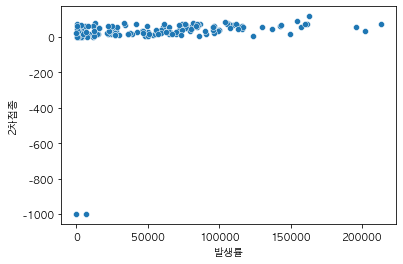

In [55]:
# 산점도로 확인하기
sns.scatterplot(x='발생률', y='2차접종', data=corona)

In [56]:
# 분석 결과 : 이상치값 확인
corona.loc[corona['2차접종']<0,:]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율
143,레소토,Lesotho,6720,2142249,14395,201795.0,4.9,126.0,147.0,2.0,-999.0,NaN,2.8,47.4,NaN,403,NaN,6830.0,NaN,24504.0,0.006720
177,미크로네시아,Micronesia,9,115023,1,69970.0,33.6,178.0,89.0,40.8,-999.0,NaN,-,100.0,NaN,0,NaN,1.0,NaN,242.0,0.000009


In [57]:
# 이상치값 제거 및 확인
corona = corona.loc[corona['2차접종']>0,:]
corona.loc[corona['2차접종']<0,:]

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율


In [58]:
corona.shape

(176, 21)

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

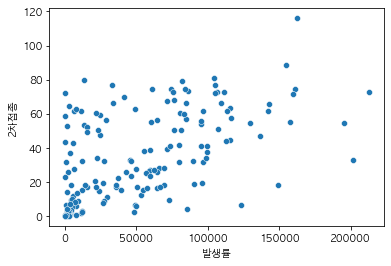

In [59]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

In [60]:
corona[['발생률','2차접종']].corr()

,발생률,2차접종
발생률,1.000000,0.578879
2차접종,0.578879,1.000000


##### (1)확인결과 : 나라별 백신 접종률과 인구당 확진자 비율은 0.578의 양의 상관관계를 갖는다

### (2) 인구당 확진자 비율과 2차 접종률의 상관관계를 찍어보자

In [61]:
corona['사망률'] = corona['사망자합계'] / corona['인구수']
corona.head()

<ipython-input-61-c371245e54e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['사망률'] = corona['사망자합계'] / corona['인구수']


,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364


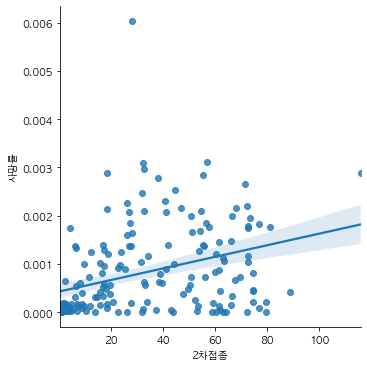

In [62]:
sns.lmplot(x='2차접종', y='사망률', data=corona)

In [63]:
corona[['사망률','2차접종']].corr()

,사망률,2차접종
사망률,1.000000,0.343234
2차접종,0.343234,1.000000


##### (2)확인결과  : 사망률과 2차 접종 과의 관계가 0.343의 양의 상관관계를 갖는다.

### (3)백신 접종률과 중증 감소의 관계

In [64]:
corona['위중증'].unique()

array(['24327\n-523', '8944', '8318', '1020', '2300', '1832\n-168', '633',
       '6707\n-58', '1496\n-20', '542', '1028', '530\n+11', nan, '1217',
       '4798', '113\n+2', '3170', '177', '1043\n+9', '1191\n+26',
       '208\n+11', '618\n+2', '28\n-1', '1458\n-42', '434\n-4', '638',
       '1403', '4387', '714\n-12', '4840\n-124', '218', '952\n+103', '43',
       '86\n-4', '776\n+3', '181\n-2', '221', '260\n+3', '45\n+4',
       '509\n+2', '503\n+42', '219\n+7', '380\n-5', '348', '200',
       '339\n-4', '5', '759', '489', '220', '391\n-5', '108', '37\n+1',
       '16\n-1', '60\n+1', '85\n+4', '11', '63\n-3', '515', '681',
       '22\n-1', '784\n-16', '166\n+4', '19\n-8', '90', '332\n-1',
       '63\n+3', '100\n+6', '192', '2', '109', '19\n+1', '21\n-3',
       '20\n+1', '131', '1', '23', '3', '1124', '36\n-2', '18', '32',
       '20', '12', '19', '42', '381', '45', '127\n-31', '19\n-4', '292',
       '152', '55\n-2', '21\n+3', '9', '7\n-1', '67', '8', '39', '10',
       '22', '24', '

* Pandas 문자열 처리
   * [].str.strip() : 앞뒤 공백을 제거
   * [].str.lstrip() : 앞 공백을 제거
   * [].str.rstrip() : 뒤 공백을 제거
   * [].str.split('구분자', n=1, expand=True) : 구분자를 기준으로 n개로 나눈다. expand=True(여러컬럼), False(하나의 컬럼)

In [65]:
corona['위중증'].str.split('\n',expand=True) # expand 는 ,를 기준으로 개수만큼 컬럼 분류하여 저장

,0,1
0,24327,-523
1,8944,None
2,8318,None
3,1020,None
4,2300,None
5,1832,-168
6,633,None
7,6707,-58
8,1496,-20
9,542,None


In [68]:
# 새로운 컬럼 추가 : 위중증 정보에서 위증주수,위중증증감 데이터를 분류
corona[['위중증_수','위중증_증감']]=corona['위중증'].str.split('\n',expand=True) # expand 는 ,를 기준으로 개수만큼 컬럼 분류하여 저장
corona.head()

/Users/works/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992,1020,None
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364,2300,None


* Pandas 데이터 타입 변경리
   * [].astype(dtype) : 모든 열의 데이터 타입을 변경
   * [].astype( {'컬럼명':dtype} ) : 특정 컬럼의 데이터 타입을 변경
        * str, int, float, category 등
        * int8, int16, int32, int64와 같이 변경 가능

In [ ]:
# 새로운 컬럼 추가 : 위중증 률
corona['위중증률'] = corona['위중증_수']/corona['인구수']

# ValueError: cannot convert float NaN to integer
# 해결 방버  : 위중증 값 계산할 때만 위중증값이 없는 국가는 제외하고 분석한다.
# 해결 code : corona['위중증_수2'] = corona['위중증_수'].copy()  # .copy()를 안붙이면 하나를 수정하면 다른 하나도 같이 수정됨.
#          : corona.loc[corona['위중증_수2'].isnull(), '위중증_수2'] = -9999
# 확인 code : corona.loc[corona['위중증_수2'].isnull()]

# TypeError: unsupported operand type(s) for /: 'str' and 'int'
# 해결 code : corona['위중증_수2']  = corona['위중증_수2'].astype('int64')
#            corona['위중증률']   = corona['위중증_수2']/corona['인구수']

In [69]:
corona.isnull().sum()

국가명            0
eng_code       0
발생률            0
인구수            0
확진자_합계         0
백신접종           0
백신보유율(인구)      0
발생률_순위         0
접종률_순위         0
1차접종           0
2차접종           0
위중증           45
치명(%)          0
완치(%)          3
확진자1일         46
사망자합계          0
사망자1일         72
완치합계           3
완치1일          61
접종비율(일간)       0
인구당확진자비율       0
사망률            0
위중증_수         45
위중증_증감       126
dtype: int64

In [70]:
# 새로운 컬럼 추가 : 위중증 률

# 에러1 해결 : 결측치 제거
corona['위중증_수2'] = corona['위중증_수'].copy()      # .copy()를 안붙이면 하나를 수정하면 다른 하나도 같이 수정됨.
corona.loc[corona['위중증_수2'].isnull(), '위중증_수2'] = -9999
corona.loc[corona['위중증_수2'].isnull()]

# 에러2 해결 : 형변환
corona['위중증_수2']  = corona['위중증_수2'].astype('int16')
corona['위중증률'] = corona['위중증_수2'] / corona['인구수']
corona

<ipython-input-70-f064b40e051e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['위중증_수2'] = corona['위중증_수'].copy()      # .copy()를 안붙이면 하나를 수정하면 다른 하나도 같이 수정됨.
/Users/works/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-70-f064b40e051e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,3.855860e+08,60.2,13.0,46.0,63.8,54.60,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523,24327,7.349488e-05
1,인도,India,24277,1380004385,33483170,8.083893e+08,29.6,101.0,99.0,43.7,14.50,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None,8944,6.481139e-06
2,브라질,Brazil,99924,212559417,21239783,2.223227e+08,53.9,27.0,62.0,69.4,37.80,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None,8318,3.913259e-05
3,영국,U.K.,109444,67886011,7429746,9.300209e+07,69.6,21.0,25.0,72.7,66.50,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992,1020,None,1020,1.502519e-05
4,러시아,Russia,49986,145934462,7294672,8.781062e+07,29.9,77.0,97.0,31.9,27.60,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364,2300,None,2300,1.576050e-05
5,프랑스,France,106557,65273511,6955333,9.226241e+07,71.2,23.0,22.0,76.7,72.70,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.106557,0.001778,1832,-168,1832,2.806652e-05
6,터키,Turkey,81187,84339067,6847259,1.051146e+08,63.2,45.0,41.0,63.3,50.50,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.081187,0.000730,633,None,633,7.505419e-06
7,이란,Iran,64794,83992949,5442232,4.200386e+07,25.2,62.0,107.0,34.1,16.60,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.064794,0.001399,6707,-58,6707,7.985194e-05
8,아르헨티나,Argentina,115923,45195774,5239232,4.901757e+07,54.5,16.0,61.0,64.5,44.30,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.115923,0.002532,1496,-20,1496,3.310044e-05
9,콜롬비아,Colombia,97107,50882891,4941064,3.833164e+07,38.0,30.0,80.0,49.3,31.70,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.097107,0.002474,542,None,542,1.065191e-05


In [72]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '인구당확진자비율',
                 '2차접종', '사망률', '위중증', '위중증_증감', '위중증_수', '위중증_수2', '위중증률']
corona_part = corona[corona_sel]
corona_part

,국가명,발생률,인구수,확진자_합계,백신접종,인구당확진자비율,2차접종,사망률,위중증,위중증_증감,위중증_수,위중증_수2,위중증률
0,미국,129632,331002651,42908619,3.855860e+08,0.129632,54.60,0.002091,24327\n-523,-523,24327,24327,7.349488e-05
1,인도,24277,1380004385,33483170,8.083893e+08,0.024263,14.50,0.000323,8944,None,8944,8944,6.481139e-06
2,브라질,99924,212559417,21239783,2.223227e+08,0.099924,37.80,0.002779,8318,None,8318,8318,3.913259e-05
3,영국,109444,67886011,7429746,9.300209e+07,0.109444,66.50,0.001992,1020,None,1020,1020,1.502519e-05
4,러시아,49986,145934462,7294672,8.781062e+07,0.049986,27.60,0.001364,2300,None,2300,2300,1.576050e-05
5,프랑스,106557,65273511,6955333,9.226241e+07,0.106557,72.70,0.001778,1832\n-168,-168,1832,1832,2.806652e-05
6,터키,81187,84339067,6847259,1.051146e+08,0.081187,50.50,0.000730,633,None,633,633,7.505419e-06
7,이란,64794,83992949,5442232,4.200386e+07,0.064794,16.60,0.001399,6707\n-58,-58,6707,6707,7.985194e-05
8,아르헨티나,115923,45195774,5239232,4.901757e+07,0.115923,44.30,0.002532,1496\n-20,-20,1496,1496,3.310044e-05
9,콜롬비아,97107,50882891,4941064,3.833164e+07,0.097107,31.70,0.002474,542,None,542,542,1.065191e-05


In [73]:
corona_part[['위중증률','2차접종']].corr()

,위중증률,2차접종
위중증률,1.000000,-0.058013
2차접종,-0.058013,1.000000


In [77]:
corona_part = corona_part[corona_part['위중증'].notnull()]
corona_part['위중증'].isnull().sum()

0

          위중증률      2차접종
위중증률  1.000000  0.252715
2차접종  0.252715  1.000000


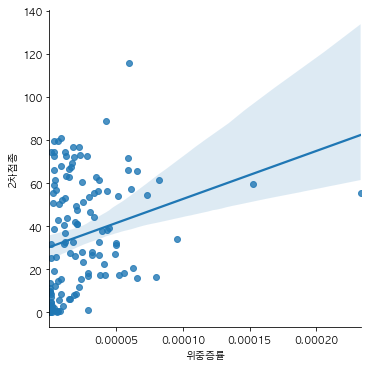

In [78]:
print(corona_part[['위중증률','2차접종']].corr())
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

## (4~6) 500만명 이상의 나라를 가져와서 데이터 상관관계를 구해보자

In [ ]:
sns.histplot(corona['인구수'])

In [97]:
corona_500m = corona.loc[corona['인구수']>5000000,:]
corona_500m.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523,24327,0.000073
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None,8944,0.000006
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None,8318,0.000039
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992,1020,None,1020,0.000015
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364,2300,None,2300,0.000016


In [98]:
corona_500m.shape

(114, 26)

In [99]:
corona_500m.describe()

,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수2,위중증률
count,114.000000,1.140000e+02,1.140000e+02,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,111.00000,90.000000,114.000000,76.000000,1.110000e+02,78.000000,1.140000e+02,114.000000,114.000000,114.000000,1.140000e+02
mean,38375.578947,6.550976e+07,1.917568e+06,5.129551e+07,32.763158,99.491228,97.833333,36.383333,28.505263,87.40991,3756.977778,39486.263158,65.236842,1.724056e+06,4778.000000,2.842397e+05,0.038375,0.000770,-1609.192982,-1.653114e-04
std,40283.221945,1.889375e+08,5.522065e+06,2.190492e+08,27.063780,49.110900,52.563769,28.001845,25.691067,15.21731,7555.053597,101240.656989,124.524147,4.840948e+06,8512.653421,9.831409e+05,0.040283,0.000975,5482.328105,4.086783e-04
min,67.000000,5.057681e+06,5.029000e+03,6.710900e+04,0.100000,7.000000,3.000000,0.100000,0.050000,29.00000,3.000000,16.000000,1.000000,4.225000e+03,1.000000,2.440000e+02,0.000067,0.000002,-9999.000000,-1.812041e-03
25%,3030.250000,9.893953e+06,8.916475e+04,2.465083e+06,5.425000,60.250000,54.250000,7.100000,3.275000,86.30000,154.500000,1373.000000,5.000000,6.663100e+04,285.500000,1.013250e+04,0.003030,0.000052,2.250000,6.710602e-08
50%,23918.500000,1.974426e+07,4.661845e+05,8.576966e+06,27.750000,101.500000,102.500000,34.900000,20.000000,93.80000,939.000000,7370.000000,17.500000,3.982200e+05,923.500000,4.122250e+04,0.023911,0.000330,88.000000,4.457976e-06
75%,65496.250000,4.560470e+07,1.230247e+06,2.929026e+07,57.050000,144.500000,144.750000,63.750000,52.700000,95.65000,2308.500000,24256.000000,49.250000,1.134455e+06,3312.750000,2.230555e+05,0.065496,0.001244,539.000000,2.094675e-05
max,157472.000000,1.439324e+09,4.290862e+07,2.174043e+09,90.500000,176.000000,178.000000,86.100000,81.000000,99.30000,41814.000000,691992.000000,778.000000,3.271510e+07,43938.000000,9.236028e+06,0.157472,0.006036,24327.000000,9.599306e-05


In [100]:
corona_500m.min()

국가명                   가나
eng_code     Afghanistan
발생률                   67
인구수              5057681
확진자_합계              5029
백신접종             67109.0
백신보유율(인구)            0.1
발생률_순위               7.0
접종률_순위               3.0
1차접종                 0.1
2차접종                0.05
치명(%)                0.1
완치(%)               29.0
확진자1일                3.0
사망자합계                 16
사망자1일                1.0
완치합계              4225.0
완치1일                 1.0
접종비율(일간)           244.0
인구당확진자비율        0.000067
사망률             0.000002
위중증_수2             -9999
위중증률           -0.001812
dtype: object

<AxesSubplot:xlabel='인구수', ylabel='Count'>

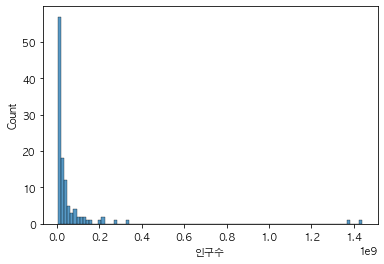

In [101]:
sns.histplot(x='인구수', data=corona_500m)

 ### (4) 백신접종률과 인구당 확진자 비율

In [102]:
corona_500m.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523,24327,0.000073
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None,8944,0.000006
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None,8318,0.000039
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992,1020,None,1020,0.000015
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364,2300,None,2300,0.000016


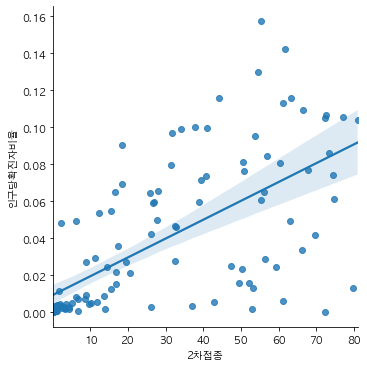

In [103]:
sns.lmplot(x='2차접종',y='인구당확진자비율',data=corona_500m)

In [104]:
corona_500m[['2차접종','인구당확진자비율']].corr()

,2차접종,인구당확진자비율
2차접종,1.000000,0.648986
인구당확진자비율,0.648986,1.000000


###### (4) 500만 인구수 국가 내에서 2차접종률과 인구당확진자 비율은 0.648의 양의 상관관계를 갖는다.

### (5) 백신 접종률과 사망률

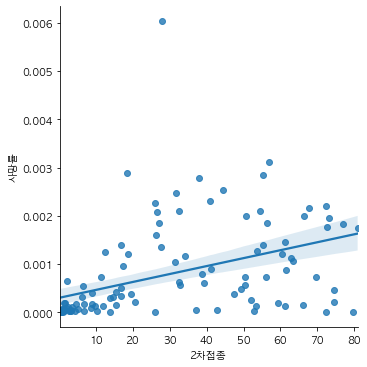

In [105]:
sns.lmplot(x='2차접종',y='사망률',data=corona_500m)

In [108]:
corona_500m[['2차접종','사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.432435
사망률,0.432435,1.000000


###### (4) 500만 인구수 국가 내에서 2차접종률과 사망률은 0.432의 양의 상관관계를 갖는다.

### (6) 백신접종률과 위중증률

In [112]:
corona_500m.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '백신보유율(인구)',
       '발생률_순위', '접종률_순위', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '인구당확진자비율', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

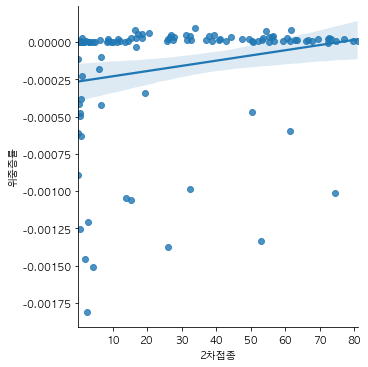

In [113]:
sns.lmplot(x='2차접종',y='위중증률',data=corona_500m)

In [114]:
corona_500m[['2차접종','사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.432435
사망률,0.432435,1.000000


In [117]:
corona_500m['위중증_수2'].unique()

array([24327,  8944,  8318,  1020,  2300,  1832,   633,  6707,  1496,
         542,  1028,   530, -9999,  1217,  4798,   113,  3170,   177,
        1043,  1191,   208,   618,    28,  1458,   434,   638,  1403,
        4387,   714,  4840,   218,   952,    43,    86,   776,   181,
         221,   260,    45,   509,   503,   219,   380,   348,   200,
         339,     5,   759,   489,   220,   391,    37,    60,   515,
         681,    22,   784,    19,    90,   332,   109,    11,    21,
          20,   131,    23,  1124,    32,    12,    42,   381,   127,
         292,   152,     7,    67,     8,     3,    24,     2],
      dtype=int16)

In [131]:
corona_500m.loc[corona_500m['위중증'].notnull() , :]  # 위중증값이 null이 아닌 것만 출력

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.60,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523,24327,7.349488e-05
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.50,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None,8944,6.481139e-06
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.80,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None,8318,3.913259e-05
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.50,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992,1020,None,1020,1.502519e-05
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.60,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364,2300,None,2300,1.576050e-05
5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,76.7,72.70,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.106557,0.001778,1832,-168,1832,2.806652e-05
6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,63.3,50.50,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.081187,0.000730,633,None,633,7.505419e-06
7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,34.1,16.60,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.064794,0.001399,6707,-58,6707,7.985194e-05
8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,64.5,44.30,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.115923,0.002532,1496,-20,1496,3.310044e-05
9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,49.3,31.70,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.097107,0.002474,542,None,542,1.065191e-05


In [144]:
corona_500m_part=corona_500m.loc[corona_500m['위중증'].notnull() , :] 
corona_500m_part

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,백신보유율(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),인구당확진자비율,사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,63.8,54.60,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.129632,0.002091,24327,-523,24327,7.349488e-05
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,43.7,14.50,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.024263,0.000323,8944,None,8944,6.481139e-06
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,69.4,37.80,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.099924,0.002779,8318,None,8318,3.913259e-05
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,72.7,66.50,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.109444,0.001992,1020,None,1020,1.502519e-05
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,31.9,27.60,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.049986,0.001364,2300,None,2300,1.576050e-05
5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,76.7,72.70,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.106557,0.001778,1832,-168,1832,2.806652e-05
6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,63.3,50.50,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.081187,0.000730,633,None,633,7.505419e-06
7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,34.1,16.60,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.064794,0.001399,6707,-58,6707,7.985194e-05
8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,64.5,44.30,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.115923,0.002532,1496,-20,1496,3.310044e-05
9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,49.3,31.70,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.097107,0.002474,542,None,542,1.065191e-05


In [145]:
corona_500m_part= corona_500m_part[['국가명','2차접종','위중증']]
corona_500m_part.head()

,국가명,2차접종,위중증
0,미국,54.6,24327\n-523
1,인도,14.5,8944
2,브라질,37.8,8318
3,영국,66.5,1020
4,러시아,27.6,2300


In [146]:
corona_500m_part[['위중증_수','위중증_증감']] = corona_500m_part['위중증'].str.split('\n',expand=True)
corona_500m_part

/Users/works/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,국가명,2차접종,위중증,위중증_수,위중증_증감
0,미국,54.60,24327\n-523,24327,-523
1,인도,14.50,8944,8944,None
2,브라질,37.80,8318,8318,None
3,영국,66.50,1020,1020,None
4,러시아,27.60,2300,2300,None
5,프랑스,72.70,1832\n-168,1832,-168
6,터키,50.50,633,633,None
7,이란,16.60,6707\n-58,6707,-58
8,아르헨티나,44.30,1496\n-20,1496,-20
9,콜롬비아,31.70,542,542,None


In [147]:
# 문자열 -> 숫자형변환
corona_500m_part['위중증_수'] = corona_500m_part['위중증_수'].astype('int16')
corona_500m_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가명     86 non-null     object 
 1   2차접종    86 non-null     float64
 2   위중증     86 non-null     object 
 3   위중증_수   86 non-null     int16  
 4   위중증_증감  39 non-null     object 
dtypes: float64(1), int16(1), object(3)
memory usage: 3.5+ KB


<ipython-input-147-36b10d2e9aaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_500m_part['위중증_수'] = corona_500m_part['위중증_수'].astype('int16')
